## __Techno-economic Assessment (TEA) for Process and Power Plant Design__
### Code for estimating fixed capital investment, fixed production costs and calculating economic performance metrics
By P.B. Tamarona

The methods and procedures are based on _Chemical Engineering Design_, 3rd Edition (Towler & Sinnott, 2021), and _Analysis, Synthesis, and Design of Chemical Processes_, 5th Edition (Turton et al., 2018).

### __1. Import the TEA module__

The module can be accessed in the GitHub repository: __[pbtamarona/techno-economic](https://github.com/pbtamarona/techno-economic)__

In [1]:
# Clone the GitHub repository into a subfolder named 'techno-economic'
!git clone https://github.com/pbtamarona/techno-economic
!cp techno-economic/*.py .

fatal: destination path 'techno-economic' already exists and is not an empty directory.
'cp' is not recognized as an internal or external command,
operable program or batch file.


In [2]:
from tea import *

### __2. Create Equipment Objects__

The second step is to create objects that represent each component in your process plant using the `Equipment`The second step is to create objects that represent each component in your process plant using the `Equipment` class. These objects capture key characteristics such as name, process type, material, and specific parameters like power or pressure.

Below are some examples:

In [3]:
# Creating objects for the process equipment
comp = Equipment(
    name='Comp-1', 
    process_type='Fluids', 
    material='Carbon steel', 
    param=150, 
    type='Compressor', 
    subtype='Centrifugal'
)

motor_comp = Equipment(
    name='Motor-1', 
    process_type='Electrical', 
    material='Carbon steel', 
    param=150/0.9,  # Adjusted for efficiency
    type='Motor/generator', 
    subtype='Totally enclosed'
)

heatX = Equipment(
    name='HeatX-1', 
    process_type='Fluids', 
    material='316 stainless steel', 
    param=50, 
    type='Heat exchanger', 
    subtype='U-tube shell & tube'
)

cooler = Equipment(
    name='Cooler-1', 
    process_type='Fluids', 
    material='Carbon steel', 
    param=60, 
    type='Heat exchanger', 
    subtype='U-tube shell & tube'
)

psa = Equipment(
    name='PSA', 
    process_type='Fluids', 
    material='Carbon steel', 
    param=800, 
    type='PSA'
)

reactor = Equipment(
    name='Reactor', 
    process_type='Mixed', 
    material='316 stainless steel', 
    param=300, 
    type='Reactor', 
    subtype='Fluidized Bed'
)


Here are the accepted inputs for Equipment Class:

The `Equipment` class supports a range of **process types**, **materials**, **equipment types**, and **subtypes**, each associated with specific costing correlations. The main parameter (`param`) should be in appropriate units depending on the equipment type (e.g., kW for motors, kW for compressors, m² for heat exchangers, etc.).

---

#### 🏭 **Process Types**

`process type` represent the nature of the equipment's role in the process and are used to determine installation and design factors:

- Solids
- Fluids
- Mixed
- Electrical

---

#### 🔩 **Material Options**

`material` affect the cost multiplier based on fabrication and corrosion resistance:

- Carbon steel
- Aluminum
- Bronze
- Cast steel
- 304 stainless steel
- 316 stainless steel
- 321 stainless steel
- Hastelloy C
- Monel
- Nickel
- Inconel

---

#### ⚙️ **Equipment Types and Subtypes**

Each `type` may include specific `subtype` options that map to different costing correlations.

| Type               | Subtype(s)                                                                 |
|--------------------|----------------------------------------------------------------------------|
| **Blower**         | *(no subtype)*                                                             |
| **Compressor**     | Centrifugal, Reciprocating                                                 |
| **Cyclone**        | *(no subtype)*                                                             |
| **Heat exchanger** | U-tube shell & tube, Floating head shell & tube, Double pipe, Thermosiphon reboiler, U-tube kettle reboiler, Plate & frame |
| **Furnace/heater** | Cylindrical furnace, Box furnace, Pyrolysis furnace, Electric furnace      |
| **Motor/generator**| Explosion proof, Totally enclosed                                          |
| **PSA**            | *(no subtype)*                                                             |
| **Pump**           | *(no subtype)*                                                             |
| **Reactor**        | Fluidized Bed, Vertical CS Vessel, Horizontal CS Vessel, Vertical 304SS Vessel, Horizontal 304SS Vessel |
| **Turbine**        | Condensing steam, Axial gas, Radial expander                               |

---

#### 📐 **Parameter (`param`) Units**

The unit for the `param` argument depends on the cost correlations used for each type of equipment:

| Equipment Type      | Sub-type                     | Source           | Parameter Meaning         | Example Unit      | Valid Value Range        |
|---------------------|------------------------------|------------------|---------------------------|-------------------|--------------------------|
| Blower              | Blower                       | Towler, 2010     | Volumetric flow rate      | m³/h              | 200 - 5000               |
| Compressor          | Centrifugal                  | Towler, 2010     | Driver power              | kW                | 75 - 30,000              |
|                     | Reciprocating                | Towler, 2010     | Driver power              | kW                | 93 - 16,800              |
| Cyclone             | Gas Multi-cyclone            | Ulrich, 2003     | Volumetric flow rate      | m³/h              | 0.1 - 45                 |
| Heat exchanger      | U-tube shell & tube          | Towler, 2010     | Heat exchanger area       | m²                | 10 - 1000                |
|                     | Floating head shell & tube   | Towler, 2010     | Heat exchanger area       | m²                | 10 - 1000                |
|                     | Double pipe                  | Towler, 2010     | Heat exchanger area       | m²                | 1 - 80                   |
|                     | Thermosiphon reboiler        | Towler, 2010     | Heat exchanger area       | m²                | 10 - 500                 |
|                     | U-tube kettle reboiler       | Towler, 2010     | Heat exchanger area       | m²                | 10 - 500                 |
|                     | Plate & frame                | Towler, 2010     | Heat exchanger area       | m²                | 1 - 500                  |
| Furnace/heater      | Cylindrical furnace          | Towler, 2010     | Heating duty              | MW                | 0.2 - 60                 |
|                     | Box furnace                  | Towler, 2010     | Heating duty              | MW                | 30 - 120                 |
|                     | Pyrolysis furnace            | Ulrich, 2003     | Heating duty              | kW                | 3000 - 60,000            |
|                     | Electric furnace (Arc)       | Parkinson, 2016  | Electric power            | MWe               | N/A                      |
| Motor/generator     | Explosion proof              | Ulrich, 2003     | Shaft power               | kW                | 2.8 - 5000               |
|                     | Totally enclosed             | Ulrich, 2003     | Shaft power               | kW                | 0.2 - 9000               |
| PSA                 | PSA                          | Towler, 1994     | Mole feed rate            | kmol/h            | N/A                      |
| Pump                | Single-stage centrifugal pump| Towler, 2010     | Volumetric flow rate      | L/s               | 0.2 - 126                |
| Reactor             | Fluidized Bed                | Ulrich, 2003     | Reactor volume            | m³                | 0.3 - 2400               |
|                     | Vertical CS Vessel           | Towler, 2010     | Shell mass                | kg                | 160 - 250,000            |
|                     | Horizontal CS Vessel         | Towler, 2010     | Shell mass                | kg                | 160 - 50,000             |
|                     | Vertical 304SS Vessel        | Towler, 2010     | Shell mass                | kg                | 120 - 250,000            |
|                     | Horizontal 304SS Vessel      | Towler, 2010     | Shell mass                | kg                | 120 - 50,000             |
| Turbine             | Condensing steam             | Towler, 2010     | Turbine power             | kW                | 100 - 20,000             |
|                     | Axial gas                    | Ulrich, 2003     | Turbine power             | kW                | 10 - 10,000              |
|                     | Radial expander              | Ulrich, 2003     | Turbine power             | kW                | 2.5 - 1500               |

##### 📝 Some notes

Ensure that the value passed to `param` is consistent with the cost correlation being applied.

The value of `param` cannot be less than the valid range. However, if it exceeds the valid range, the class will consider an additional number of parallel units.

Once you have created the objects for your process plant equipment, you can check the estimated purchase and direct costs of each component as follows

In [4]:
print(f"Purchase cost of the compressor: ${comp.purchased_cost:,.2f}")
print(f"Direct cost of the compressor: ${comp.direct_cost:,.2f}")

Purchase cost of the compressor: $1,431,033.56
Direct cost of the compressor: $4,579,307.38


### __3. Estimating Fixed Capital Investment__

Now we estimate the total fixed capital investment (FCI) of the plant, which consists of:

- Inside Battery Limits (ISBL)  
- Outside Battery Limits (OSBL)  
- Design and engineering costs
- Contingency

Estimated using the following equation:

$$
\text{FCI} = \text{ISBL} \cdot (1 + OS) \cdot (1 + D\&E + X) \cdot LF
$$

Where, ISBL is the total of equipment direct costs and the other are factors are determined based on the user inputs in the plant configuration: `process_type`, `country`, and `region`.

- **Process type**: Determines the nature of the plant's operation and influences cost estimation factors. The available types are:  
    - `Solids`: OS = 0.4, D\&E = 0.2, X = 0.1  
    - `Fluids`: OS = 0.3, D\&E = 0.3, X = 0.1  
    - `Mixed`: OS = 0.4, D\&E = 0.25, X = 0.1  

- **Country & region**: Determines the location factor (_LF_), which adjusts the estimated capital cost to reflect local economic conditions and construction costs. Available countries and regions are:  

    - **United States**
        - Gulf Coast: 1.00  
        - East Coast: 1.04  
        - West Coast: 1.07  
        - Midwest: 1.02  
    - **Canada** 
        - Ontario: 1.00  
        - Fort McMurray: 1.60  
    - **Mexico**: 1.03  
    - **Brazil**: 1.14  
    - **China**  
        - Imported: 1.12  
        - Indigenous: 0.61  
    - **Japan**: 1.26  
    - **Southeast Asia**: 1.12  
    - **Australia**: 1.21  
    - **India**: 1.02  
    - **Middle East**: 1.07  
    - **France**: 1.13  
    - **Germany**: 1.11  
    - **Italy**: 1.14  
    - **Netherlands**: 1.19  
    - **Russia**: 1.53  
    - **United Kingdom**: 1.02  

*Note: These factors are based on _Chemical Engineering Design_, 3rd Edition (Towler & Sinnott, 2021).*


These basic plant inputs are provided in the `config` dictionary as follows:

In [5]:
config = {
    'process_type': 'Mixed',
    'country': 'Netherlands',
    'region': None,
    # List all the process equipment objects that have been created below
    # This is for calculating the ISBL cost
    'equipment': [
        comp,
        motor_comp,
        heatX,
        cooler,
        psa,
        reactor
    ]
}

Using function `calculate_fixed_capital`, we calculate the ISBL, OSBL, design and engineering costs, contigency and FCI values:

In [6]:
isbl, osbl, dne, x, fci = calculate_fixed_capital(config)

# Print the resultS
print("Capital Cost Estimation")
print("===================================")
print(f"ISBL: ${isbl:,.2f}")
print(f"OSBL: ${osbl:,.2f}")
print(f"Design and Engineering: ${dne:,.2f}")
print(f"Contingency: ${x:,.2f}")
print(f"Fixed Capital Investment: ${fci:,.2f}")

Capital Cost Estimation
ISBL: $11,087,471.91
OSBL: $4,434,988.76
Design and Engineering: $3,880,615.17
Contingency: $1,552,246.07
Fixed Capital Investment: $20,955,321.91


### __4. Estimating Variable Production Costs__

The function `calculate_variable_opex` calculates the variable of the production expenses, which includes:
- Electricity
- Water (cooling, etc.)
- Natural Gas
- Chemicals
- Other utilities or consumables defined in the configuration

These costs are calculated based on the annual **consumption** and **unit price** for each resource.

All variable cost items are grouped under the `variable_opex` key in a `config` dictionary. Each item is itself a dictionary with the following keys:

- `consumption`: Annual consumption of the resource
- `price`: Unit price in USD
- `price_std` *(optional)*: Standard deviation in price (optional for uncertainty analysis, you can ignore this for now)

In [7]:
config.update({
    'variable_opex_inputs': {
        'electricity': {
            'consumption': 100_000*1e3,# kWh/year
            'price': 0.10,            # USD/kWh
            'price_std': 0.025/2,
            'price_max': 3,
            'price_min': 0.01
        },
        'water': {
            'consumption': 1_000_000, # m³/year
            'price': 0.3,             # USD/m³
            'price_std': 0.05,
            'price_max': 0.6,
            'price_min': 0.01
        },
        'natural gas': {
            'consumption': 1_000_000, # MMBtu/year
            'price': 3.5,             # USD/MMBtu
            'price_std': 0.5,
            'price_max': 5.0,
            'price_min': 0
        },
        'chemicals': {
            'consumption': 500_000,   # tonnes/year
            'price': 40,              # USD/tonne
            'price_std': 10,
            'price_max': 80,
            'price_min': 5
        },
        # Add more variable opex items as needed        
    }
})

Now we can use the `calculate_variable_opex` function:

In [8]:
variable_production_costs = calculate_variable_opex(config)

# Print the results
print(f"Variable OPEX: ${variable_production_costs:,.2f} per year")

Variable OPEX: $33,800,000.00 per year


### __5. Estimating Fixed Production Costs__

The function `calculate_fixed_opex` calculates the fixed portion of the operating expenses, which includes:
- Maintenance
- Taxes and insurance
- Operating labor
- Supervision and overhead
- et cetera.

In addition to fixed capital investment, the fixed production costs are estimated based on the plant's working capital, variable production costs , interest rate and operator's hourly rate.

*Note, this is mainly calculated based on _Analysis, Synthesis, and Design of Chemical Processes_, 5th Edition (Turton et al., 2018)

Therefore, we first need to update our plant `config` dictionary with these financial parameters:

In [9]:
config.update({
    'working_capital': 0.15*config['fixed_capital'],  # Common assumption for working capital: 15% of the fixed capital
    'interest_rate': 0.09,  # The annual interest rate used for financing, here set at 9%.
    'operator_hourly_rate': 38.11  # The hourly rate of 1 process plant operator (in US$/hour)
})

Now we can use the `calculate_fixed_opex` function:

In [10]:
fixed_production_costs = calculate_fixed_opex(config)

# Print the results
print("Operating Cost Estimation")
print("===================================")
print(f"Variable OPEX: ${variable_production_costs:,.2f}")
print(f"Fixed OPEX: ${fixed_production_costs:,.2f}")
print(f"Total OPEX: ${fixed_production_costs+variable_production_costs:,.2f}")

Operating Cost Estimation
Variable OPEX: $33,800,000.00
Fixed OPEX: $11,330,199.26
Total OPEX: $45,130,199.26


### __6. Calculating Economic Performance Metrics__

Once we have the total CAPEX (i.e., Fixed Capital Investment or FCI) and OPEX (i.e., variable and fixed operating costs), we can calculate the key economic performance metrics.

This code covers the following metrics:
- __Net-present value (NPV)__
- __Internal rate of return (IRR)__
- __Payback time (PBT)__
- __Return of investment (ROI)__
- __Levelized cost__

The first step in calculating the metrics is to create the cash flow for the process plant throughout its lifetime.

To do this, we need the following inputs in our plant config dictionary:
- Project lifetime (in years, minimum of 3 years)
- Annual production of the product (e.g. MWh/year of electricity, kg/year of H2)
- Price of product in US$/unit (ensure that the unit matches the one used for annual production)
- Income tax rate

In [11]:
config.update({
    'project_lifetime': 20,  # in years
    'annual_prod': 10_000_000,  # in unit per year
    'product_price': 5,  # in currency per unit
    'tax_rate': 0.3,  # assuming 30% tax rate
})

To create the process plant cash flow table, we use the function `create_cash_flow_table` as follows:

In [12]:
print("Cash Flow Table")
print("================")
create_cash_flow_table(config)

Cash Flow Table


,Year,Capital cost,Production [unit],Revenue,Cash cost of prod.,Gross profit,Depreciation,Taxable income,Tax paid,Cash flow,PV of cash flow,NPV
0,1,"$6,286,596.57",$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,"$-6,286,596.57","$-5,767,519.79","$-5,767,519.79"
1,2,"$12,573,193.15",$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,"$-12,573,193.15","$-10,582,605.12","$-16,350,124.92"
2,3,"$5,238,830.48","$4,000,000.00","$20,000,000.00","$24,850,199.26","$-4,850,199.26",$0.00,"$-4,850,199.26",$0.00,"$-10,089,029.74","$-7,790,582.10","$-24,140,707.01"
3,4,$0.00,"$8,000,000.00","$40,000,000.00","$38,370,199.26","$1,629,800.74","$2,095,532.19","$-465,731.45",$0.00,"$1,629,800.74","$1,154,591.93","$-22,986,115.08"
4,5,$0.00,"$10,000,000.00","$50,000,000.00","$45,130,199.26","$4,869,800.74","$2,095,532.19","$2,774,268.55",$0.00,"$4,869,800.74","$3,165,036.34","$-19,821,078.74"
5,6,$0.00,"$10,000,000.00","$50,000,000.00","$45,130,199.26","$4,869,800.74","$2,095,532.19","$2,774,268.55","$832,280.56","$4,037,520.17","$2,407,441.36","$-17,413,637.37"
6,7,$0.00,"$10,000,000.00","$50,000,000.00","$45,130,199.26","$4,869,800.74","$2,095,532.19","$2,774,268.55","$832,280.56","$4,037,520.17","$2,208,661.80","$-15,204,975.58"
7,8,$0.00,"$10,000,000.00","$50,000,000.00","$45,130,199.26","$4,869,800.74","$2,095,532.19","$2,774,268.55","$832,280.56","$4,037,520.17","$2,026,295.23","$-13,178,680.35"
8,9,$0.00,"$10,000,000.00","$50,000,000.00","$45,130,199.26","$4,869,800.74","$2,095,532.19","$2,774,268.55","$832,280.56","$4,037,520.17","$1,858,986.45","$-11,319,693.90"
9,10,$0.00,"$10,000,000.00","$50,000,000.00","$45,130,199.26","$4,869,800.74","$2,095,532.19","$2,774,268.55","$832,280.56","$4,037,520.17","$1,705,492.15","$-9,614,201.74"


Tha annual variation in the cash flow is calculated based on the typical start-up schedule of a chemical plant, as described in _Chemical Engineering Design_, 3rd Edition (Towler & Sinnott, 2021).

Below is the start-up schedule adapted for the cash flow calculation in this code:


| **Year**  | **Costs**                                                                 | **Revenues**              | **Explanation**                             |
|-----------|---------------------------------------------------------------------------|---------------------------|---------------------------------------------|
| 1st       | 30% of FCI                                                                | 0                         | Engineering and long lead-time items        |
| 2nd       | 60% of FCI                                                                | 0                         | Procurement and construction                |
| 3rd       | 10% of FCI + working capital + fixed production costs + 40% of variable production costs | 40% of design revenue    | Remaining construction and initial production |
| 4th       | Fixed production costs + 80% of variable production costs                 | 80% of design revenue     | Shake-down of plant                         |
| 5th+++    | Fixed + variable production costs                                         | 100% of design revenue    | Full production at design rates             |

---
As you may have noticed in the cash flow table, the __NPVs__ for each year of the project lifetime are calculated in the last column.

Now, based on this cash flow, we can calculate the remaining economic performance metrics as follows:

In [13]:
print(f"Internal rate of return: {round(calculate_irr(config),3) * 100}%")
print(f"Payback time: {round(calculate_payback_time(config),1)} years")
print(f"Return on investment: {round(calculate_roi(config),4) * 100}%")

Internal rate of return: 9.6%
Payback time: 6.7 years
Return on investment: 12.13%


There have been many type of levelized cost equations in the literature. In this code we opt to choose this version:

$$
\text{LCOP} = 
\frac{\displaystyle
  \sum_{t=1}^{tp} \frac{\text{CAPEX}_t + \text{OPEX}_t}{(1 + i)^t}
}{\displaystyle
  \sum_{t=1}^{tp} \frac{\text{PRODUCT}_{t}}{(1 + i)^t}
}
$$

where $\text{LCOP}$ is the levelized cost of products, $\text{CAPEX}_t$ represents the capital cost in year $ t $, $ \text{OPEX}_t $ is the cash cost of production (total OPEX) in year $ t $, and $ \text{PRODUCT}_{t} $ is the amount of product produced in year $ t $, while $ i $ is the fixed interest rate (discount rate). The year index, $ t $, ranging from 1 to $ t_p $, where $ t_p $ represents the project lifetime in years.

In [14]:
print(f"LCOP: ${round(calculate_levelized_cost(config),3)}/unit")

LCOP: $4.908/unit


### **7. Sensitivity Analyses**

In TEA, sensitivity analysis is crucial to evaluate how uncertainties in input parameters affect the overall results. Cost estimates, operating parameters, and economic assumptions often involve inherent variability. By conducting sensitivity analyses, we can identify which variables have the most significant impact on the final economic metric—in this case, the LCOP—and assess how the plant performs under economic uncertainty.

This section presents two types of sensitivity analyses:

- **Tornado plot analysis**  
  A deterministic one-at-a-time (OAT) sensitivity analysis. Each selected input parameter is varied by a fixed percentage (e.g., ±50%) while keeping others constant. The resulting change in LCOH is visualized in a tornado plot, which highlights the most influential parameters by bar length.

- **Monte Carlo analysis**  
  A probabilistic method that considers simultaneous variations of all uncertain input parameters. Each parameter is defined by a probability distribution (e.g., truncated normal), and a large number of simulations (e.g., 1,000,000) are conducted to generate a distribution of LCOP outcomes. This method provides a way to assess economic performance under simultaneous uncertainty in all key inputs.

#### __Tornado plot analysis__
The following functions are used to generate the tornado plot with ±50% variation:

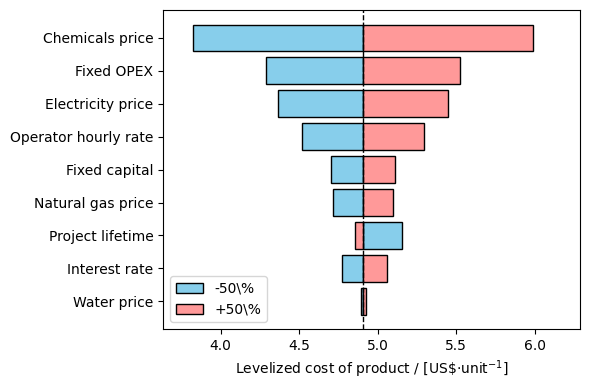

In [15]:
tornado_plot(config, plus_minus_value=0.5)

The tornado plot shows that chemicals price and fixed OPEX are the most influential factors affecting LCOP, followed by operator hourly rate and natural gas price. Conversely, variables such as water price, interest rate, and project lifetime have relatively minor impacts. This visualization helps prioritize which parameters require more accurate estimation or tighter control in order to reduce economic uncertainty.

#### __Monte Carlo analysis__
The `monte_carlo()` function performs the Monte Carlo analysis based on uncertain input parameters. It includes the following arguments:

- **`num_samples`** *(default: 1,000,000)*: Total number of samples drawn for the simulation. A higher value increases accuracy but requires more computation time.
- **`batch_size`** *(default: 1,000)*: Number of samples processed in each batch to manage memory usage efficiently.
- **`show_input_distributions`** *(True/False)*: If `True`, displays histograms of sampled input distributions to visualize uncertainty in each variable.

Running Monte Carlo: 100%|██████████| 1000/1000 [00:43<00:00, 23.12it/s]


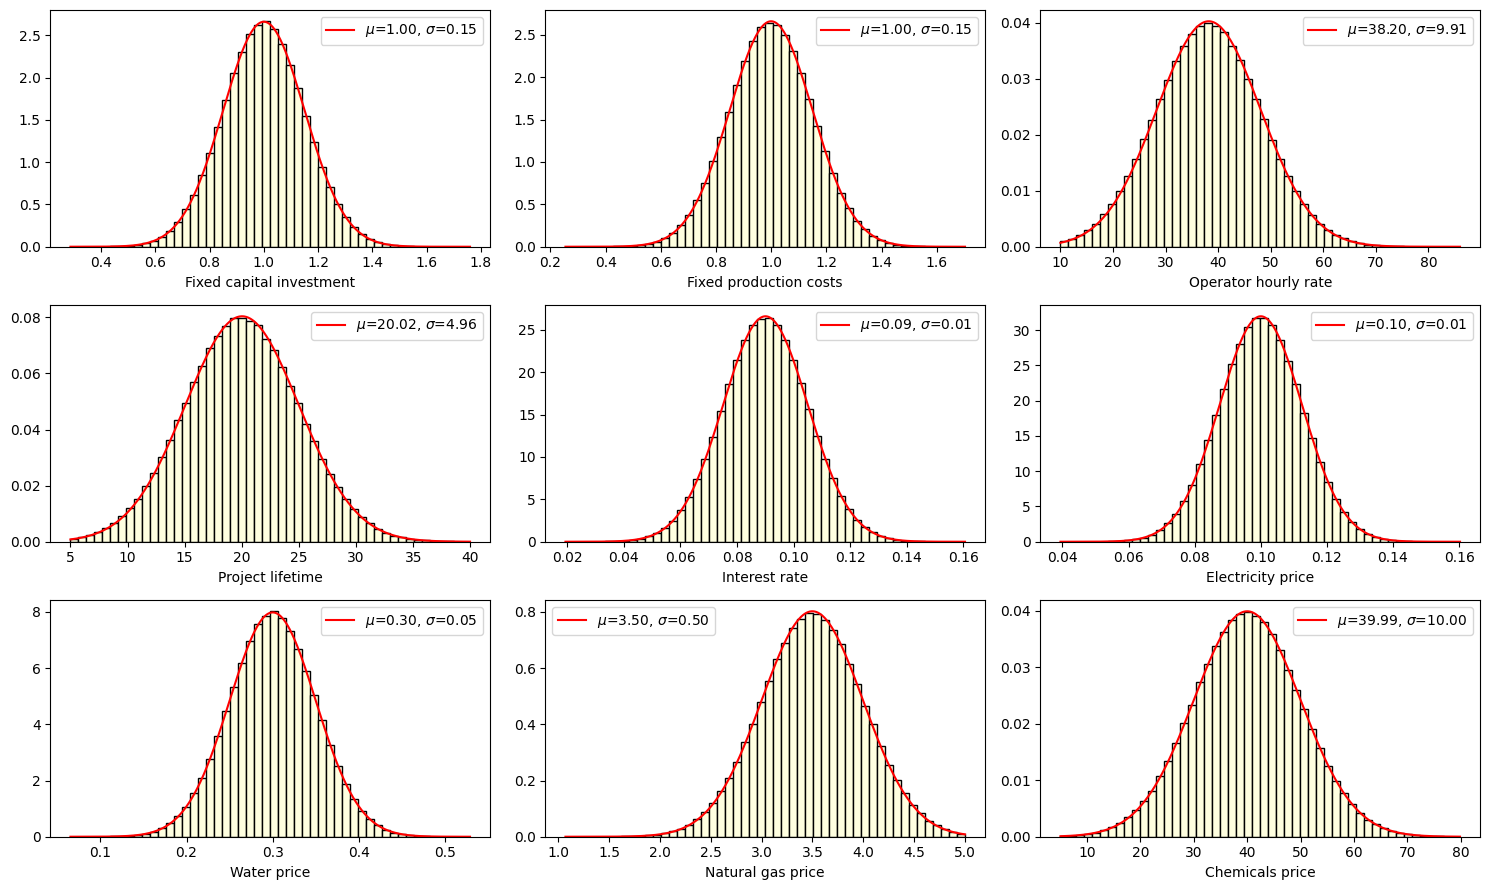

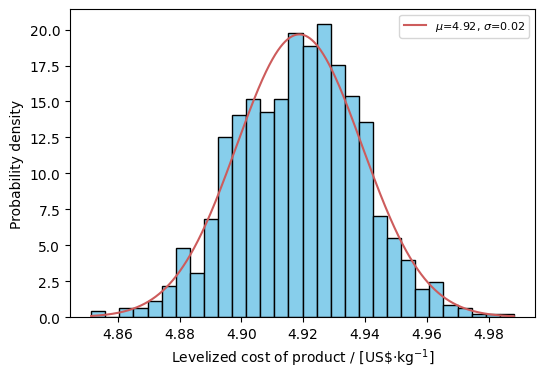

In [16]:
lcohs = monte_carlo(config, num_samples=1_000_000, batch_size=1000, show_input_distributions=True)

The first set of plots shows the input parameter distributions used in the Monte Carlo analysis. Each histogram represents the assumed variability in a specific economic or operational parameter, such as fixed capital, interest rate, or natural gas price. The red lines indicate the fitted normal distribution for each parameter.

The final plot displays the resulting distribution of the LCOP based on 1,000,000 simulation samples. The narrow distribution (mean: 4.42 USD/kg, standard deviation: 0.02) indicates that the LCOP is relatively stable under the assumed uncertainties, suggesting a robust economic performance for the given process configuration.